## Eliminate the phase (randomizing true and inital value)

Instead of sampling discrete phases, it is also possible to allow the force constant to be negative and eliminate the phase. Mathematically it is the same. A negative K is the same as flipping the phase angle from 0 to 180. This approach reduces the amount of parameters by half. In this notebook, the true value has more terms than in the first notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.backends.sqlite_plus as db

In [2]:
toy = ToyModel(n_increments=18, sample_phase=False)

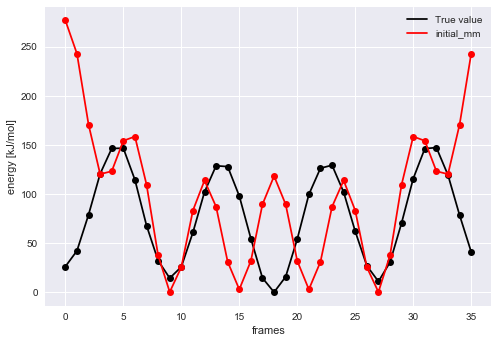

In [3]:
plt.plot(toy.synthetic_energy, color='black', label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='r', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

In [4]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='eliminate_rj_randomized.sqlite')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 335.8 sec

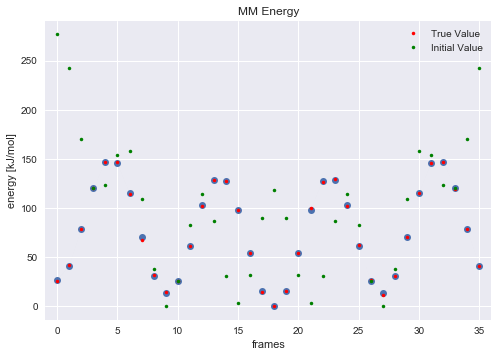

In [8]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, '.', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, '.', color='g', label='Initial Value')
plt.legend()
plt.savefig('energy_fit_elim_rj_randomized.pdf')

#### Again the fit looks good!
Equilibration time is somewhat longer than in the easier case but still not too bad.

In [5]:
import pymbar.timeseries as ts
[t, g, N_eff] = ts.detectEquilibration(sampler.trace('sigma')[:])
print('Start of equilibrated data: {}'.format(t))

Start of equilibrated data: 2841


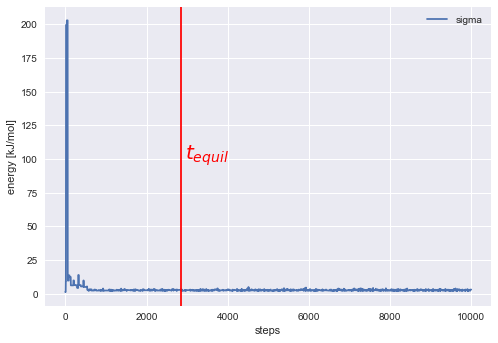

In [11]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.axvline(t, color='red')
plt.text(t+100,100, r'$t_{equil}$', color='red', fontsize=20)
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_elim_rj_randomized.pdf')

### The true multiplicities are the most likely to be turned on!

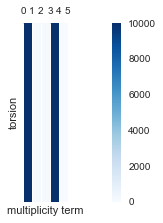

In [12]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0)
plt.savefig('multiplicity_elim_rj_randomized.pdf')

In [13]:
toy.true_value

<DihedralTypes [<DihedralType; phi_k=3.154, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=15.268, per=4, phase=180.000,  scee=1.000, scnb=1.000>]>

#### The marginal posterior of Ks that are on are distributed around the true value.

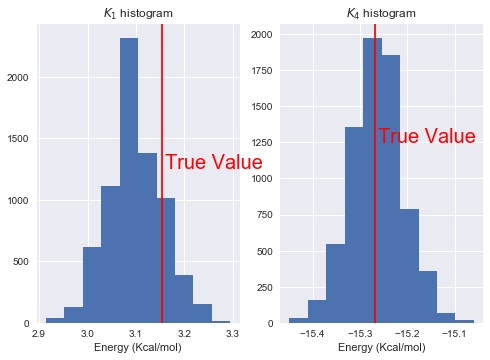

In [42]:
plt.subplot(1, 2, 2)
plt.hist(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4')
plt.axvline(toy.true_value[1].phi_k*-1, color='red')
plt.text(toy.true_value[1].phi_k*-1+0.005, 1250, 'True Value', color='red', fontsize=20)
plt.title(r'$K_4$ histogram')
plt.xlabel('Energy (Kcal/mol)')
plt.subplot(1, 2, 1)
plt.hist(sampler.CG331_CG321_CG321_CG331_1_K.trace[t:], label='K_4')
plt.axvline(toy.true_value[0].phi_k, color='red')
plt.text(toy.true_value[0].phi_k+0.005, 1250, 'True Value', color='red', fontsize=20)
plt.title(r'$K_1$ histogram')
plt.xlabel('Energy (Kcal/mol)')
plt.savefig('hist_randomized.pdf')

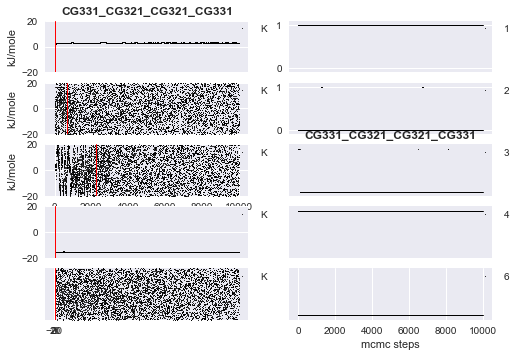

In [14]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=2.0, filename='traces_elim_rj_randomized.pdf')

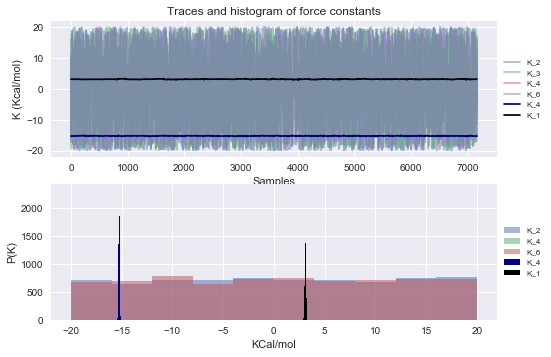

In [43]:
alpha = 0.5
plt.subplot(2, 1, 1)
plt.title('Traces and histogram of force constants')
plt.plot(sampler.CG331_CG321_CG321_CG331_2_K.trace[t:], label='K_2', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_3_K.trace[t:], label='K_3', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_6_K.trace[t:], label='K_6', alpha=alpha)
plt.plot(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4', color='navy')
plt.plot(sampler.CG331_CG321_CG321_CG331_1_K.trace[t:], label='K_1', color='black')
plt.xlabel('Samples')
plt.ylabel('K (Kcal/mol)')


lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(2, 1, 2)
plt.hist(sampler.CG331_CG321_CG321_CG331_2_K.trace[t:], label='K_2', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_6_K.trace[t:], label='K_6', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4', color='navy')
plt.hist(sampler.CG331_CG321_CG321_CG331_1_K.trace[t:], label='K_1', color='black')

lgd = plt.legend(prop={'size': 8}, loc='center left', bbox_to_anchor=(1, 0.5))


plt.xlabel('KCal/mol')
plt.ylabel('P(K)')
plt.savefig('trace_hist_randomized.pdf')

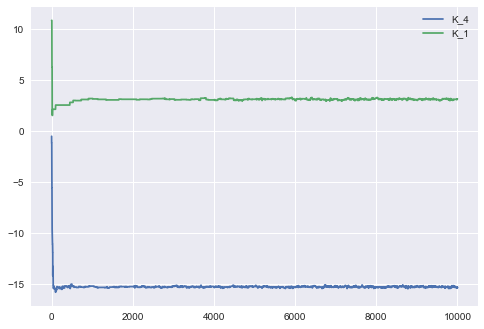

In [22]:
plt.plot(sampler.CG331_CG321_CG321_CG331_4_K.trace[:], label='K_4')
plt.plot(sampler.CG331_CG321_CG321_CG331_1_K.trace[:], label='K_1')
plt.legend()